In [40]:
# Some necessary business out of the way...
rooturl = '../images/'

from PIL import Image
import urllib, cStringIO
from matplotlib.pyplot import imshow
import json
import urlparse
import requests
import numpy

%pylab inline

def smim(url, desiredWidth, figdim):
    plt.figure(figsize=(figdim,figdim))
    imageFile = cStringIO.StringIO(urllib.urlopen(url).read())
    image = Image.open(cStringIO.StringIO(urllib.urlopen(url).read()))
    (w, h) = image.size
    imageResized = image.resize((desiredWidth, int(float(desiredWidth)*(float(h)/float(w)))), Image.NEAREST)
    imshow(np.asarray(imageResized))
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().set_frame_on(False)

Populating the interactive namespace from numpy and matplotlib


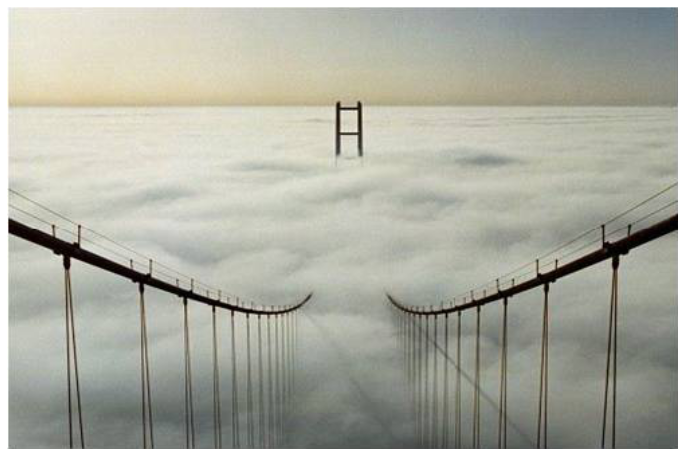

In [41]:
smim(rooturl + 'bridge-in-cloud.jpg', 500, 12)

# Microsoft Cloud Stack for Research 

### rob5@uw.edu is Rob Fatland, UW Cloud Director

## Takeaway

* Premise: Researchers Do Not Care About The Cloud... (What is the cloud??)
* Ground up support: your browser
* UW is cloud agnostic; the real issue is { how? when? }
* The Harsh Wild West is littered with power tools...
* Test locally... and attend to other warnings

and finally... Python

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### More takeaways

* My belief is that the cloud is more familiar than strange
* Python... Jupyter... VS... PTVS... pip install azure, netcdf4, metpy
* This talk is a path through the graph
    * Microsoft, Azure, Visual Studio
    * Python
    * Azure ML
* Rob's Law
* Repro
* Figure out how ( figure out how ( figure out how ( ... (do something) ...)))
* The real question may be: Where do we bet our time learning new technologies?
    * It is incumbent on the early adopters to leave breadcrumbs

Therefore...

### Call To Action!

* Join { Cloud iTeam }, help us build the Fog Bank

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# start()


My premises

* Researchers do not care about the cloud as an end in itself. 
* ToDo[ ] > timeAvailable

* ${\LARGE \Sigma \neq 0}$

* Research process > insight > papers > and so on
* Or win by enabling others to have success in their research
* A good way to save you time is to connect you with what you already know how to do 

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### What's the value claim for the Microsoft stack?

* Microsoft is building out Azure, Python like mad
* Visual Studio helps you write code + github
* Microsoft means Open Source
    * http://research.microsoft.com/downloads
        * WWT, Narwhal, FetchClimate, CNTK
* Microsoft must document the heck out of everything
* Look for the familiar things within...
    * Python SDK for Azure Services
    * Visual Studio Python toolkit for Azure
    * Azure Machine Learning Studio and Python
    * Python SDK for Azure Machine Learning
    * Jupyter in Azure Machine Learning
    * Anaconda distributions (kilroy; see Shah's email) for Windows and Linux

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### My work

* Lightweight Data Systems (LWDS) workshop, Seattle, UW
* Research > Public Use
    * LiveOcean
    * Ice2Ocean
    * AralDIF    
* BDS spans from microbial ecology to marine geochemistry
* Visualization: Narwhal

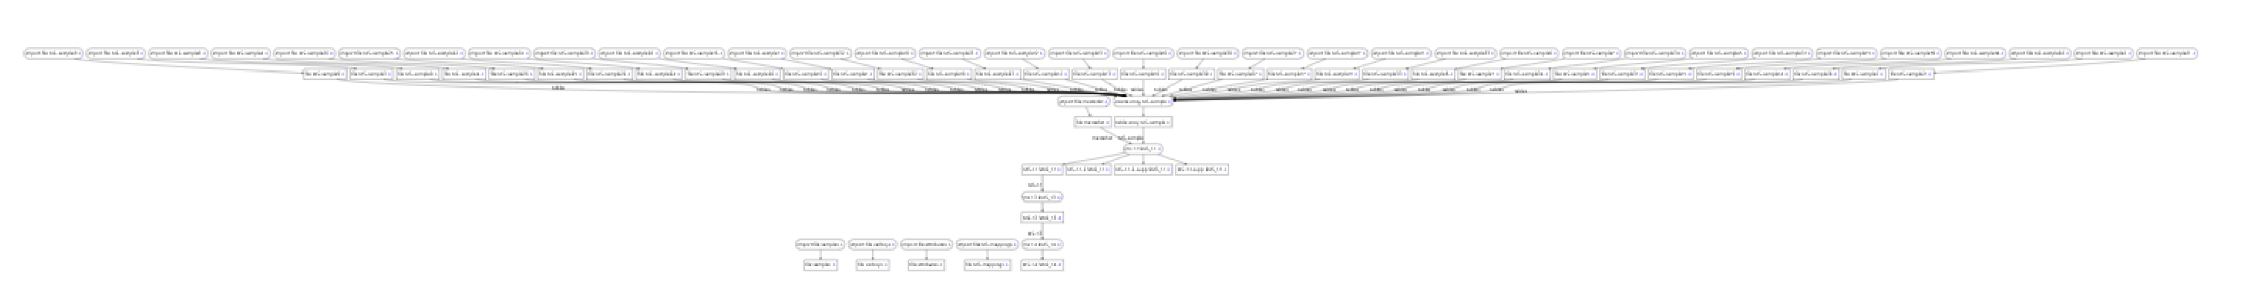

In [42]:
smim(rooturl + 'BDS_Provenance_All.png', 3000, 40)

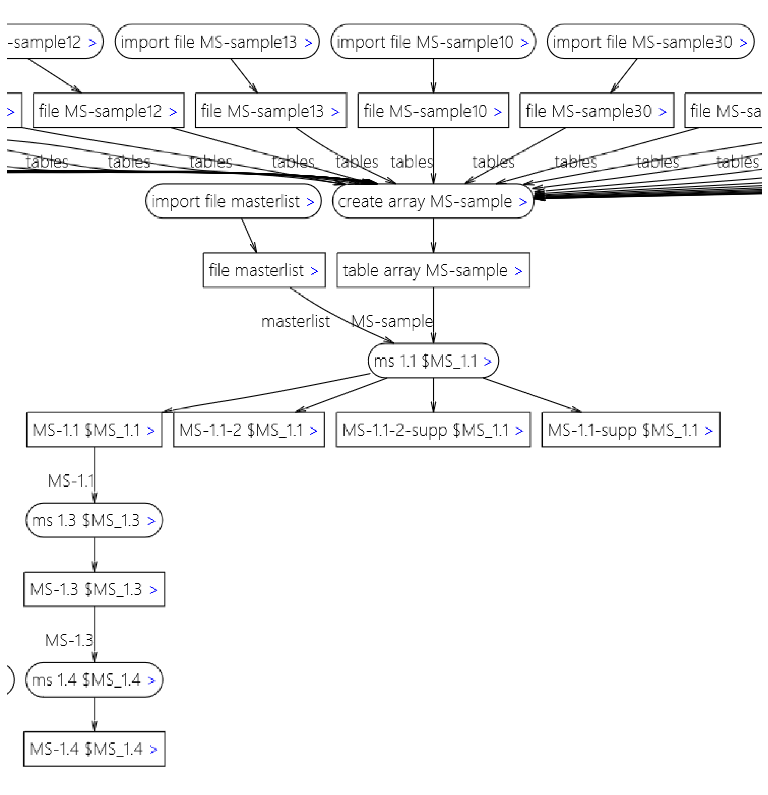

In [43]:
smim(rooturl + 'BDS_Provenance_Detail.png', 2500, 14)

# Executable papers...

...are supported by VMs, Docker containers, iPython Notebooks and in workflow reconstruction such as shown above from the BDS. 

* Private >  Publish
* Geochemistry > Any perfunctory data chain
* Value to participate
* Free MATLAB execution
* Levels
* Provenance tree
* Query construction P|P
* Publish elsewhere via confederation
* API culture 

# The second bridge

* In 2004 Naomi Oreskes -- science historian -- publishes 'Beyond The Ivory Tower'
    * Study of peer review abstracts in relation to AGCC
* Many implications but of particular interest is OSTP/CDI/'resiliency'
* The political questions concern stability and brokerage
* They create a push back that eventually implies API culture: Who is the consumer?

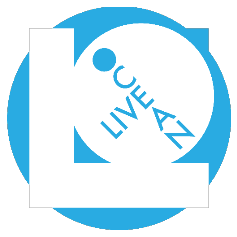

In [44]:
smim(rooturl + 'LiveOcean Logo.png', 500, 4)

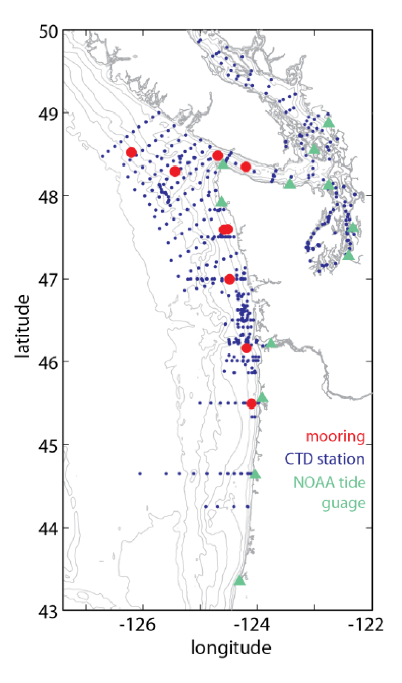

In [45]:
smim(rooturl + 'region of interest with validation moorings indicated.png',1200,12)

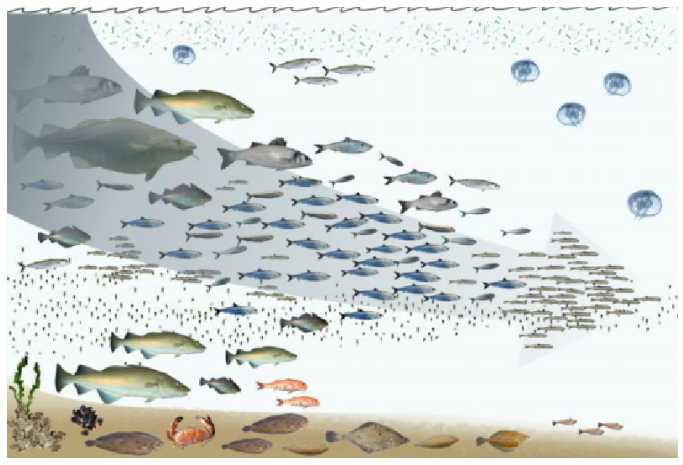

In [46]:
smim(rooturl + 'marine trophic level diagram placeholder.png', 800, 12)

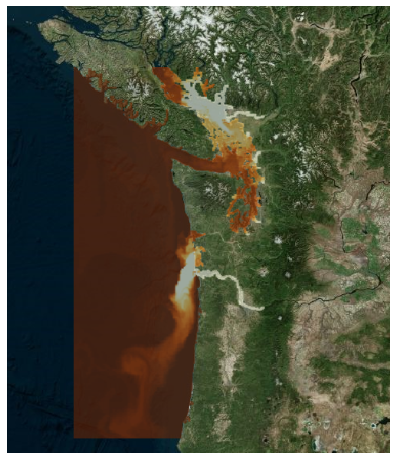

In [47]:
smim(rooturl + 'region of interest bing maps overlay surface salinity orange colormap.png', 500, 8)

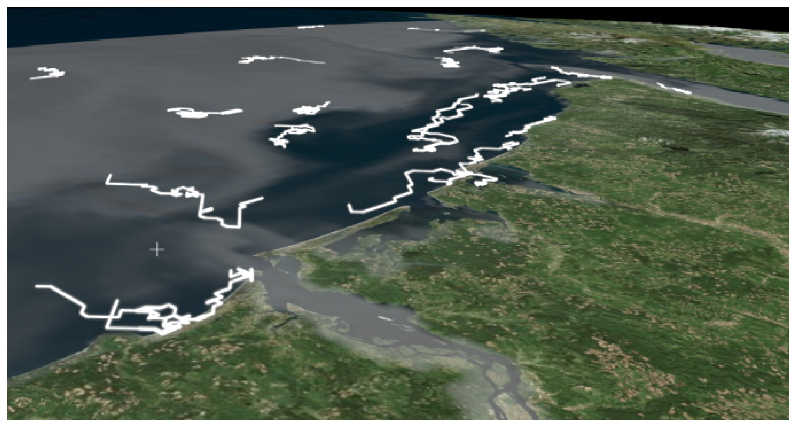

In [48]:
smim(rooturl + 'LiveOcean zooplankton whale simple example.png', 1600, 14)

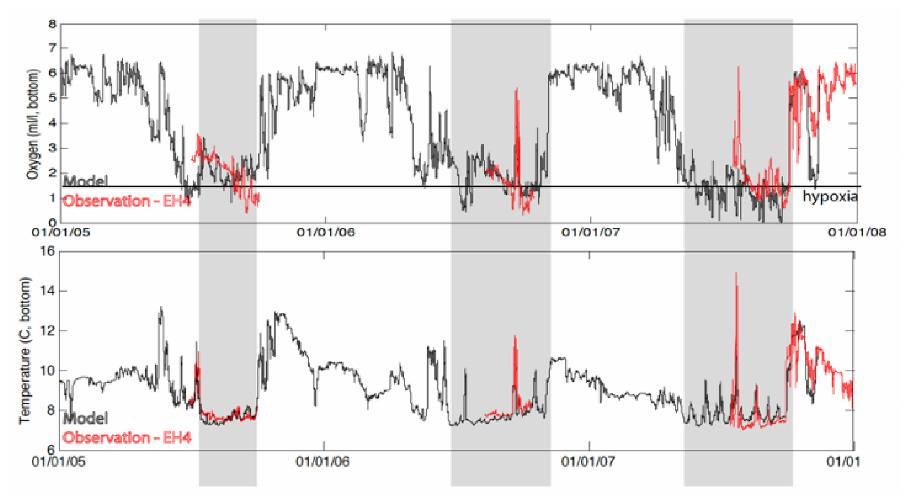

In [49]:
smim(rooturl + 'ROMS model validation from Siedlecki.png', 2000, 16)

In [50]:
# Establish the api base URL
liveoceanUrl = "http://liveocean.azurewebsites.net/api/"

In [52]:
# We move on now to the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
requestcall = "get-value"

# data_args = {'date':'2015-05-28T22:00:00Z', 'depthMeters':'-10.0','param':'salt'}
data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':'-10.0','param':'salt'}
apiReply = requests.get(urlparse.urljoin(liveoceanUrl, requestcall), params=data_args)

print 'Call =', apiReply.url 
print 'Reply status is', apiReply.ok
print 'Status code is', apiReply.status_code, '\n'

# convert response to json
jsonReply = apiReply.json()
print 'jsonized get-value reply is of', type(jsonReply), '; length', len(jsonReply)

# pull out the dictionary entries, 'min', 'max' and 'data'
minValue = jsonReply['min']
maxValue = jsonReply['max']
print 'minValue is of', type(minValue), 'with value', minValue
print 'maxValue is of', type(maxValue), 'with value', maxValue
print ""
print ""
data=jsonReply['data']
print 'The data entry of this dictionary is of', type(data)

# Determine the dimensions of the data List-of-Lists
numLists = len(data)
numElementsPerList = len(data[0])
print 'API getvalue provides', numLists, 'lists each with', numElementsPerList, 'elements','\n'

# Print a couple of exemplars, one from the water and one from the masked-out land
print 'element 341 of list 131, data[130][340], is',data[130][340],'which is ',type(data[130][340]),'\n'
print 'element 381 of list 174, data[173][380], is',data[173][380],'which is ',type(data[173][380]),'\n'

# Count the number of float values and 'Nones' to ensure they sum to the total grid cell count
nFloat = 0
nNone = 0
for s in data:
    for t in s:
        if (isinstance(t,float)):
            nFloat += 1
        else:
            nNone += 1
        
print 'floats:',nFloat,'and Nones:',nNone, 'sum is',nFloat+nNone,'and area is',numLists*numElementsPerList
print ""

if nFloat + nNone != numLists*numElementsPerList:
    print ""
    print "data check finds a discrepancy between expected types and grid area."
    print ""
    print "Kilroy: SERIOUS PROBLEM, data field is not self-consistent"
    print ""
    print ""
else:
    print ""
    print "data check shows data[][] is self-consistent"
    print ""

Call = http://liveocean.azurewebsites.net/api/get-value?date=2015-06-02T06%3A00%3A00Z&depthMeters=-10.0&param=salt
Reply status is True
Status code is 200 

jsonized get-value reply is of <type 'dict'> ; length 3
minValue is of <type 'float'> with value 0.0
maxValue is of <type 'float'> with value 9.99999993382e+36


The data entry of this dictionary is of <type 'list'>
API getvalue provides 174 lists each with 381 elements 

element 341 of list 131, data[130][340], is 30.5909303454 which is  <type 'float'> 

element 381 of list 174, data[173][380], is None which is  <type 'NoneType'> 

floats: 36284 and Nones: 30010 sum is 66294 and area is 66294


data check shows data[][] is self-consistent



depth: 0.0 api reply: 200 , salinity patch stddev: 0.332045723704
depth: 40.0 api reply: 200 , salinity patch stddev: 0.14948438476
depth: 80.0 api reply: 200 , salinity patch stddev: 0.0481690226117
depth: 120.0 api reply: 200 , salinity patch stddev: 0.0623041869531
depth: 160.0 api reply: 200 , salinity patch stddev: 0.0254780399756
depth: 200.0 api reply: 200 , salinity patch stddev: 0.049649984863
depth: 240.0 api reply: 200 , salinity patch stddev: 0.0357312007768
depth: 280.0 api reply: 200 , salinity patch stddev: 0.0193025552542
depth: 320.0 api reply: 200 , salinity patch stddev: 0.0133339685073
depth: 360.0 api reply: 200 , salinity patch stddev: 0.0135767149215
depth: 400.0 api reply: 200 , salinity patch stddev: 0.0138900122285
depth: 440.0 api reply: 200 , salinity patch stddev: 0.0130542356872
depth: 480.0 api reply: 200 , salinity patch stddev: 0.0116838671347
depth: 520.0 api reply: 200 , salinity patch stddev: 0.0107374614662
depth: 560.0 api reply: 200 , salinity pat

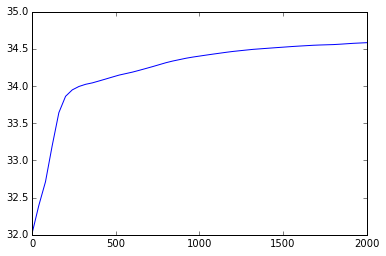

In [54]:
# We move on now to the get-value api call: JSON format, contents are data (in this case salinity at 10 meters depth)
lonIndex = 10
latIndex = 10
myD = []
myS = []
signal = []

for x in arange(0.0, 2001.0, 40.0):
    thisDepth = str(-x)
    # print thisDepth
    requestcall = "get-value"
    # data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':'0.0','param':'salt'}
    data_args = {'date':'2015-06-02T06:00:00Z', 'depthMeters':thisDepth,'param':'salt'}
    # print data_args
    apiReply = requests.get(urlparse.urljoin(liveoceanUrl, requestcall), params=data_args)
    jsonReply = apiReply.json()
    data=jsonReply['data']
    myD.append(x)
    myS.append(data[10][10])
    patch = []
    for j in range(3,30):
        for k in range (3,30):
            patch.append(data[j][k])
    print 'depth:', x, 'api reply:', apiReply.status_code, ', salinity patch stddev:', std(patch)
    signal.append(std(patch))
    
plot(myD, myS)

### Problem 4 Understand a NetCDF file from an ARGO buoy

#### Jargon


repl


'Read-Eval-Print Loop' is the command line; and it applies to python generally and iPython Notebooks. 



C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


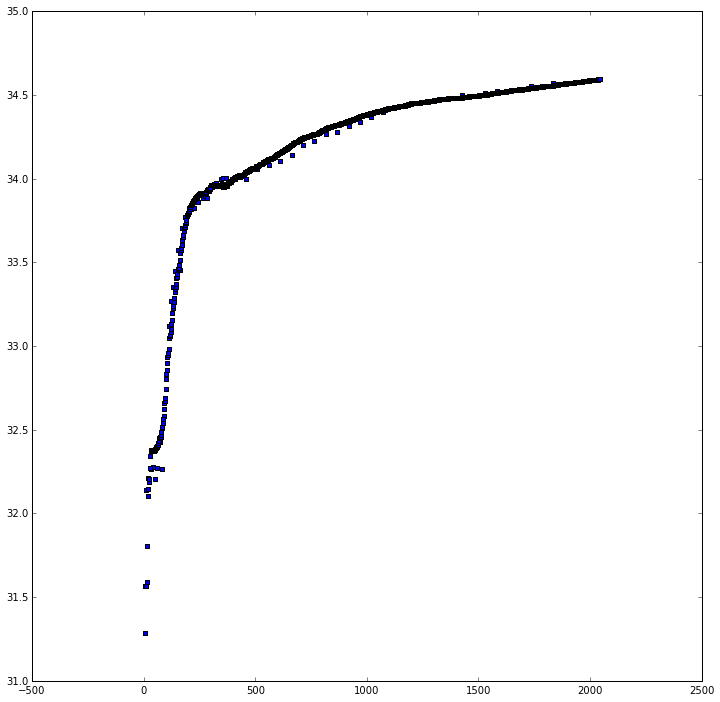

In [55]:
# The amount of effort to recover this ARGO file is beyond the scope of this talk

import matplotlib
import netCDF4
from netCDF4 import *

# How we might explore the netCDF4 Library:
# print dir(netCDF4)
# We particularly might eventually care about Dataset and num2date

# Not intended to be an operational conversion constant!
decibarsToMeters = 1019.977/1000.0

f = Dataset("../data/R5903601_130.nc",'r', Format='NETCDF4')
g = Dataset("../data/argo-profiles-4901664.nc",'r',Format='NETCDF4')

# From the following two lines I culled out some interesting variables...
# 
# for v in f.variables:
#     print [v]
# 
# Notice they are encoded with the unicode lead-character 'u':
# 
# [u'REFERENCE_DATE_TIME']
# [u'DATE_CREATION']
# [u'DATE_UPDATE']
# [u'PLATFORM_NUMBER']
# [u'PROJECT_NAME']
# [u'PI_NAME']
# [u'STATION_PARAMETERS']
# [u'CYCLE_NUMBER']
# [u'DIRECTION']
# [u'DATA_MODE']
# [u'PLATFORM_TYPE']
# [u'JULD']
# [u'LATITUDE']
# [u'LONGITUDE']
# [u'POSITIONING_SYSTEM']
# [u'VERTICAL_SAMPLING_SCHEME']
# [u'PROFILE_PRES_QC']
# [u'PRES']
# [u'PRES_ADJUSTED']
# [u'TEMP']
# [u'TEMP_ADJUSTED']
# [u'PSAL']
# [u'PSAL_ADJUSTED']
# [u'SCIENTIFIC_CALIB_COMMENT']
# 
# So more on these below; let's first get to the main points for salinity and depth

# Pressure will be a proxy for depth. Salinity increases with depth. Temp decreases with depth.
psalLabel=u'PSAL'
presLabel=u'PRES'
tempLabel=u'TEMP'

# Provide both the units of measure and the array dimensions for the data
# print "Here is the first file Kilroy found:"
# print ""
# print f.variables[psalLabel].units
# print f.variables[psalLabel].shape
# print f.variables[presLabel].units
# print f.variables[presLabel].shape
# print f.variables[tempLabel].units
# print f.variables[tempLabel].shape
# print ""
# print ""
# print "Here is the second file Kilroy found:"
# print ""
# print g.variables[psalLabel].units
# print g.variables[psalLabel].shape
# print g.variables[presLabel].units
# print g.variables[presLabel].shape
# print g.variables[tempLabel].units
# print g.variables[tempLabel].shape
# print ""
#print ""


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity=f.variables[psalLabel][0,:]
pressureDecibars=f.variables[presLabel][0,:]
temperature=f.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters

# Here is the salinity versus depth plot
# plot(depthMeters,salinity)

# Let's hold off before we do the comparison:
# plot(myD, myS)


# From the 2-D data we pull 1-D arrays using the wildcard ':' character
#   This follows after just test-printing everything! [0] is the important stuff
salinity2 = g.variables[psalLabel][0,:]
pressureDecibars2 = g.variables[presLabel][0,:]
temperature2 = g.variables[tempLabel][0,:]

# Using an approximate conversion constant we go from pressure to depth
depthMeters = pressureDecibars*decibarsToMeters
depthMeters2 = pressureDecibars2*decibarsToMeters

# Here is the salinity versus depth plot
# plot(depthMeters,salinity)
# plot(depthMeters2,salinity2)
figdim = 12
figure(figsize=(figdim,figdim))
scatter(depthMeters, salinity, marker = ',')
scatter(depthMeters2, salinity2, marker = ',')

In [56]:
# This cell determines location and time of the data (irrespective of drift velocity << LiveOcean cell size)

import datetime

latLabel=u'LATITUDE'
lonLabel=u'LONGITUDE'

# Of the following 'DATE_CREATION' and 'DATE_UPDATE' were identical and useful
refDTLabel=u'REFERENCE_DATE_TIME'
dateCreationLabel=u'DATE_CREATION'
dateUpdateLabel=u'DATE_UPDATE'
juldLabel=u'JULD'

# print f.variables[latLabel].shape
# print f.variables[lonLabel].shape
# print f.variables[latLabel][:]
# print f.variables[lonLabel][:]

# print f.variables[refDTLabel][:]
# print f.variables[dateCreationLabel][:]
# print f.variables[dateUpdateLabel][:]
# print f.variables[juldLabel][:]

# From the above (commented out) we determine:

argoLat = 44.152
argoLon = -126.483
argoDate = datetime.datetime(2015,6,2,5,31,34)

print 'The data are timestamped at approximately', argoDate

# Now what is needed...
# Data and Time for this data...
# Cell values (all 40) at that location from LO

# This cell prints out some other interesting information from the NetCDF file

print 'Platform number (expect 5903601):', f.variables[u'PLATFORM_NUMBER'][0,:]

print 'Project name:', f.variables[u'PROJECT_NAME'][0,:]
print 'PI name:', f.variables[u'PI_NAME'][0,:]
print 'Station parameters:', f.variables[u'STATION_PARAMETERS'][0,:]
print 'Cycle number (expect 130):', f.variables[u'CYCLE_NUMBER'][:]
print 'Direction:', f.variables[u'DIRECTION'][:]
print 'Data mode:', f.variables[u'DATA_MODE'][:]
print 'Platform type:', f.variables[u'PLATFORM_TYPE'][0,:]
print 'Positioning system:', f.variables[u'POSITIONING_SYSTEM'][0,:]

# and so on... 
# print 'Vertical sampling scheme:', f.variables[u'VERTICAL_SAMPLING_SCHEME'][:]
# print 'Scientific calibration comment:', f.variables[u'SCIENTIFIC_CALIB_COMMENT'][0,0,0,:]



# The CTD has "adjusted" versions of the data: Are they the same or different???
# These lines show that adjusted pressure is off by 30 cm and salinity and temperature are ok
pressureAdjusted = f.variables[u'PRES_ADJUSTED'][0,:]
# print pressureAdjusted - pressureDecibars
tempAdjusted = f.variables[u'TEMP_ADJUSTED'][0,:]
# print tempAdjusted - temperature
psalAdjusted = f.variables[u'PSAL_ADJUSTED'][0,:]
# print psalAdjusted - salinity

The data are timestamped at approximately 2015-06-02 05:31:34
Platform number (expect 5903601): ['5' '9' '0' '3' '6' '0' '1' --]
Project name: ['U' 'S' -- 'A' 'R' 'G' 'O' -- 'P' 'R' 'O' 'J' 'E' 'C' 'T' -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
PI name: ['S' 'T' 'E' 'P' 'H' 'E' 'N' -- 'R' 'I' 'S' 'E' 'R' -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
Station parameters: [['P' 'R' 'E' 'S' -- -- -- -- -- -- -- -- -- -- -- --]
 ['T' 'E' 'M' 'P' -- -- -- -- -- -- -- -- -- -- -- --]
 ['P' 'S' 'A' 'L' -- -- -- -- -- -- -- -- -- -- -- --]]
Cycle number (expect 130): [130 130]
Direction: ['A' 'A']
Data mode: ['A' 'A']
Platform type: ['A' 'P' 'E' 'X' -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- --]
Positioning system: ['A' 'R' 'G' 'O' 'S' -- -- -

### Does ARGO Validate LiveOcean in this one example?¶

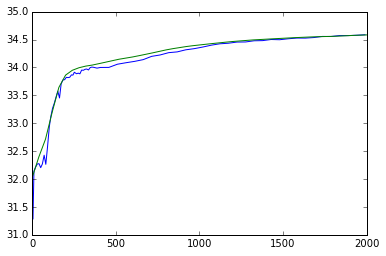

In [57]:
plot(depthMeters,salinity)
plot(myD, myS)

<Container object of 3 artists>

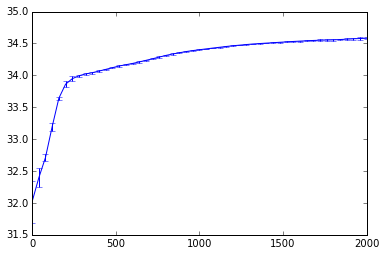

In [58]:
plt.errorbar(myD, myS, yerr=signal)

# Returning to the Microsoft Cloud Technology Stack

## Projects, Solutions

* Explore http://research.microsoft.com for tools and projects
* Open source examples: Computational Network Toolkit, Tabular, FetchClimate, WRF on Azure, ...
* Explore YouTube videos around Visual Studio. Examples around Python include PTVS, Flask, Bottle, Django
* At UW: Open Source: LiveOcean, Ice2Ocean
* BDS Geochemistry online data Library
* Visualization: Worldwide Telescope + Narwhal (1e7 data points; time; geometry)


## Visual Studio

* Host your software in the Azure cloud; also git-friendly
* Easy to collaborate on (Big!) software projects: Add people
* Tools for managing software development: Backlog, task lists, charting...
* Plays well with languages (python) and development environments (eclipse)
* Free


${\LARGE INTELLISENSE}$

* PTVS
* Python SDK for Azure Services... a library
* Azure Machine Learning Studio and Python
* Python SDK for Azure Machine Learning
* Jupyter in Azure Machine Learning
* Anaconda distributions

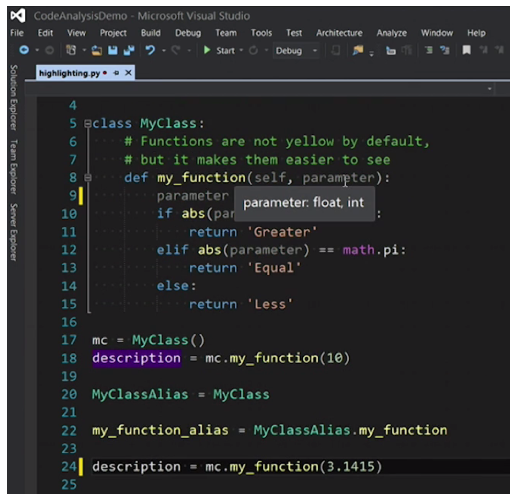

In [59]:
smim(rooturl + 'Visual Studio python code editor features.png', 2400, 9)

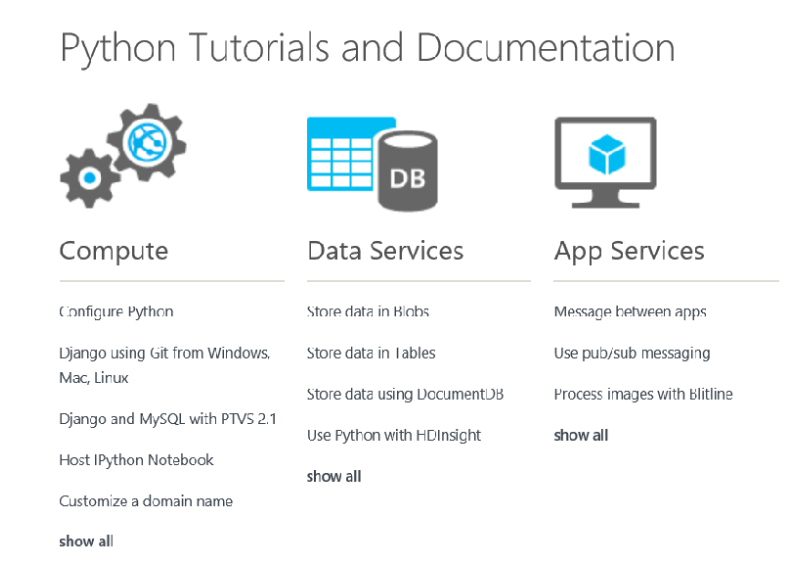

In [60]:
smim(rooturl + 'Python and Azure Tools.png', 800, 14)

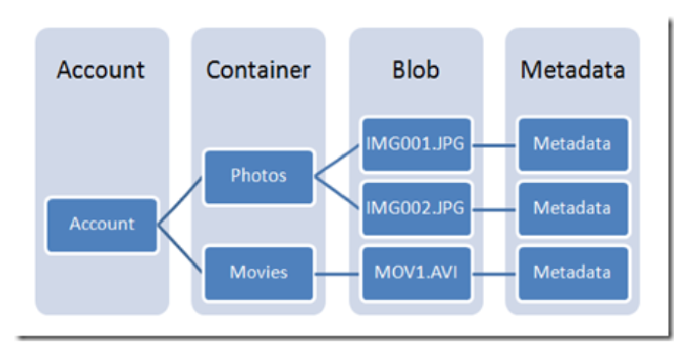

In [61]:
smim(rooturl + 'Blob Diagram.png', 1400, 12)

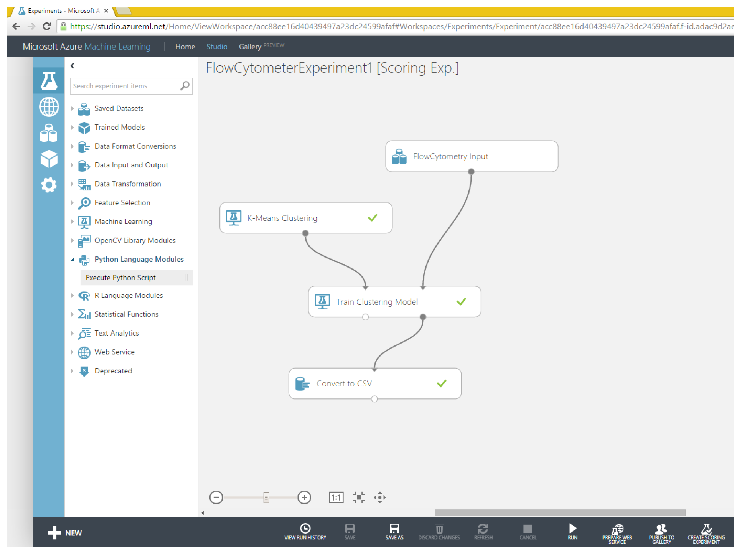

In [62]:
smim(rooturl + 'Azure ML Studio Experiment.png', 2400, 13)

# Concluding remarks

* The Microsoft cloud technology stack: A UFO crashlanded in the desert...
* Solving problems resources: Stack Overflow, Youtube, MSDN, azure.microsoft.com, ... 


## URLs


### WRF running on the Azure cloud
* http://weatherservice.cloudapp.net and please note that 'Northwind' is not a real company. This WRF instance was built by Wenming Ye and others out of Microsoft.


### Visual Studio
* Get it! https://www.visualstudio.com/
* Intellisense: https://msdn.microsoft.com/en-us/library/hcw1s69b.aspx



### Azure
* Azure: http://azure.microsoft.com
* Azure For Research: http://azure4research.com (a short compelling proposal nets you 6 months of Azure cloud resources)
* Azure blob storage: https://azure.microsoft.com/en-us/documentation/articles/storage-python-how-to-use-blob-storage/
* Azure Machine Learning Studio: https://studio.azureml.net/Home
* Azure Resource Explorer: http://azure.microsoft.com/blog/2015/04/02/azure-resource-explorer-a-new-tool-to-discover-the-azure-api/



### Python
* Python tools for Visual Studio: http://github.com/Microsoft/PTVS/releases
* Steve Dower's video overview of python in Visual Studio: http://aka.ms/ptvs 
* More excellent video overviews from Steve: https://www.visualstudio.com/en-us/explore/dn919931#Fragment_Videos
* PyData conference in Seattle July 24-26 http://conf.pydata.org/seattle2015/
* Why use Virtual Environments for python in the cloud? https://github.com/Microsoft/PTVS/wiki/Python-Environments
* Nice condensation of python data structures: https://docs.python.org/2/tutorial/datastructures.html#tuples-and-sequences
* DANGEROUS!!! WARNING!!! TEST SITE ONLY!!! Public Jupyter: http://ipnb.azurewebsites.net/



Contact me about the above and about the {Cloud iTeam} at rob5@uw.edu

# Below Here There Be Dragons

#### Tim Durham's Repro of RDD Persistence Fail on Python on HDInsight on Azure

In [28]:
from __future__ import division
import glob
import numpy
import pickle
from pyspark import SparkContext, AccumulatorParam, StorageLevel
import random

sc = SparkContext( 'spark://headnodehost:7077', 'pyspark')

ImportError: No module named pyspark

In [29]:
#this is the test matrix size I have been using - generate random data of this size
matsize = (4000,127,24)
rand_tmp = numpy.random.normal(size=matsize)

#parallelize the data structures (in the actual application I keep track of NaN values, not negatives)
pdata_tmp = sc.parallelize(rand_tmp, numSlices=12)
lt0_tmp = sc.parallelize(rand_tmp < 0, numSlices=12)

#zip the two data structures together so that maps will iterate over them in parallel
pdata_test = pdata_tmp.zip(lt0_tmp)

#persist and count the data structure, print out size and contents of first 2-element list
print(pdata_test.persist().count())
print(pdata_test.first()[0].shape, pdata_test.first()[1].shape)
print(pdata_test.first())

NameError: name 'sc' is not defined